<a href="https://colab.research.google.com/github/Gus-1003/Meteorologia_Estudos_Dados/blob/main/An%C3%A1lise_Dados_Historicos_Anuais_INMET/Analise_INMET_Natal_RN_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Fonte:***
    - https://tempo.inmet.gov.br/TabelaEstacoes/A001

# ***Referência para Programação:***
    - https://insightlab.ufc.br/6-truques-do-pandas-para-impulsionar-sua-analise-de-dados

# Conceito Base:

1. O conjuntos de dados está relacionado com o intervalo de 1 ano de fatos capturados pela estação meteorologica do municipio de Natal - RN - Brasil. 

2. Esses conjuntos de dados podem ser vistos como tarefas de classificação ou regressão. Possui 19 colunas/atributos todas vinculadas com aspectos importantes da climatologia local.

Preparação dos Dados:


* Data: (Dia / Mês / Ano) -> Dia da captura dos dados;

* Hora (UTC): 

---

* Temp. Ins. (C):

* Temp. Max. (C):

* Temp. Min. (C):

---

* Umi. Ins. (%): 

* Umi. Max. (%): 

* Umi. Min. (%):

---

* Pto Orvalho Ins. (C): 

* Pto Orvalho Max. (C): 

* Pto Orvalho Min. (C):

---

* Pressao Ins. (hPa):

* Pressao Max. (hPa):

* Pressao Min. (hPa):

---

* Vel. Vento (m/s):

* Dir. Vento (m/s):

* Raj. Vento (m/s):

---

* Radiacao (KJ/m²):

* Chuva (mm):

# ***Importando Bibliotecas Python:***

In [1]:
#Bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import LabelEncoder

# ***Criação do Dataframe:***

In [2]:
dados = 'https://raw.githubusercontent.com/Gus-1003/Meteorologia_Estudos_Dados/main/An%C3%A1lise_Dados_Historicos_Anuais_INMET/Ano2021/NATAL%20(A304)_2021-01-01_2021-12-31.csv'
dataframe = pd.read_csv(dados, delimiter=";", quotechar='"')

# ***Análise Exploratoria***:



***Objetivo:*** Ter o conhecimento sobre a base de dados;

***Tipos de tecnicas:***

    Quantitaivas:
        * Frequência - Atributo assume um mesmo valor; 
        * Localização - Pontos de referência;
        * Atributos Numericos:
            Média - posição equidistante dos extremos;
            Desvio padrão;
        * Atributos Categoricos - Moda - Valor encontrado com maior frequência;
        * Dispersão / espalhamento;
        * Intervalo;

    Visuais:
        * Diagrama de Disperção - Relacionar variáveis numéricas;
        * Diagrama de Caixa
        * Histograma
        * Nuvem de Palavras

    Aprendizagem de Maquina:
        * Supervisionado;
        * Não - Supervisionado;

## Visualização dos dados:

In [3]:
# Esta função retorna as primeiras n linhas do objeto com base na posição. É útil para testar rapidamente se o seu objeto contém o tipo certo de dados.
dataframe.head(25)

,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
0,01/01/2021,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2021,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2021,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/01/2021,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/2021,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01/01/2021,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,01/01/2021,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,01/01/2021,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,01/01/2021,800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,01/01/2021,900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Retorna uma tupla representando a dimensionalidade do DataFrame.
dataframe.shape

(8760, 19)

***Análise:***

*   São contabilizadas no total 8760 registros de medidas(linhas) em 19 features (colunas);
*   Os 10 primeiros registros apresentam valores NaN (Not a Number) - Podendo significar alterações não desejadas no dataset que podem si repertir posteriormente;
*   Ao avaliar o padrão conseguimos concluir que os valores NaN ocorrem no periodo de 0 até 900 do atributo UTC (Marca as horas do dia). Podendo assim concluir que as Metricas em questão só são efetuadas de 10h até as 22h, a partir desse ponto elas voltam a ser NaN; 



## Metricas de cada atributo:

In [5]:
# Esse método imprime informações sobre um DataFrame, incluindo o dtype(Tipo do dado) e a quantidade de indices na coluna, valores não nulos e uso de memória.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Data                  8760 non-null   object
 1   Hora (UTC)            8760 non-null   int64 
 2   Temp. Ins. (C)        4110 non-null   object
 3   Temp. Max. (C)        4096 non-null   object
 4   Temp. Min. (C)        4096 non-null   object
 5   Umi. Ins. (%)         4110 non-null   object
 6   Umi. Max. (%)         4096 non-null   object
 7   Umi. Min. (%)         4096 non-null   object
 8   Pto Orvalho Ins. (C)  4110 non-null   object
 9   Pto Orvalho Max. (C)  4096 non-null   object
 10  Pto Orvalho Min. (C)  4096 non-null   object
 11  Pressao Ins. (hPa)    4110 non-null   object
 12  Pressao Max. (hPa)    4096 non-null   object
 13  Pressao Min. (hPa)    4096 non-null   object
 14  Vel. Vento (m/s)      4110 non-null   object
 15  Dir. Vento (m/s)      4110 non-null   

***Análise:***

*   As colunas "Data" e "Hora(UTC)" aprensentam mais que o dobro de amostras que as outras colunas;
*   Com exceção da coluna "Hora" ,que possui valores numericos e inteiros, todos os outros atributos são do tipo "Object";
*   A coluna com menos registros é a Raj. Vento com 4043 indices;

In [6]:
# O método "describe" gera estatísticas descritivas. 
    # incluem aquelas que resumem a tendência central, dispersão e forma da distribuição de um conjunto de dados, excluindo NaNvalores.
dataframe.describe()

,Hora (UTC)
count,8760.000000
mean,1150.000000
std,692.258169
min,0.000000
25%,575.000000
50%,1150.000000
75%,1725.000000
max,2300.000000


***Explicação: Métricas***

* **count**: número de observações não nulas

* **mean**: média dos valores

* **std**: desvio padrão

* **max**: valor máximo

* **min**: valor mínimo

***Análise:***

*   O método "descibe" por padrão avalia somente as features do tipo inteiro ou flutuante. Nesse caso ele está avaliando somente a coluna de "Horas (UTC)";
*   Apesar de conseguirmos saber disso só visualizando a tabela inicial, aqui temos a certeza que o minimo é 00h e o máximo é 23h;

In [7]:
# Para dados de objetos (por exemplo, strings ou timestamps), o índice do resultado incluirá count, unique, top e freq.

# count =  Quantos indices naquela coluna.
# unique =  Quantos valores diferentes aquela coluna possui.
# top =  o valor que mais si repete. 
# freq = a frequência que esse valor si repetiu

dataframe.describe(include='object')

,Data,Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
count,8760,4110,4096,4096,4110,4096,4096,4110,4096,4096,4110,4096,4096,4110,4110,4043,4080,4110
unique,365,92,99,88,47,43,49,76,76,75,128,127,130,83,167,137,3871,9
top,01/01/2021,"28,6","29,4","28,8","69,0","72,0","67,0","23,4","24,0","22,6","1006,6","1006,6","1006,2","4,9","134,0","9,1","246,90","0,0"
freq,24,128,121,138,300,325,292,183,193,200,98,91,99,160,110,101,3,4016


***Análise:***

*   O atributo "Chuva (mm)" só possui 9 valores unicos, desses 9 valores o atributo "0" si repetiu 4016x;
*   O atributo "Radiação' é o que menos possui repetições de valores;
*   O atributo "Umi.Max.' é o que menos possui menos valores únicos, o que implica que a frequência de repetição desses valores está bem distribuido;

***Conclusão Preliminar:***

*   A frequência de chuvas indicam que durante a maior parte do ano de 2021 Natal passou por um grande periodo de estiagem;
*   Podemos considerar que essas metricas são efetuadas durante o periodo diurno e talvez alguns registros podem não ter sido contabilizados;

***Questionamento Gerados:***

*   Pode ocorrer valores diferentes de chuva ao decorrer de um mesmo dia?
*   Essas quantidades estão sendo contabilizadas?



***Pensamento:***

*   Desenvolver tabela e gráficos baseado nos valores unicos do atributo Data (Dia; Mês; Ano) e a quantidade de chuva que ocorreu em relação a:
    + Quantas chuvas ocorreram em determinado mês:
    + Qual mês possui chuvas mais intensas:

## Limpando o Dataset:

In [8]:
#verifica quantas amostras possuem valor NaN por coluna
dataframe.isna().sum()

Data                       0
Hora (UTC)                 0
Temp. Ins. (C)          4650
Temp. Max. (C)          4664
Temp. Min. (C)          4664
Umi. Ins. (%)           4650
Umi. Max. (%)           4664
Umi. Min. (%)           4664
Pto Orvalho Ins. (C)    4650
Pto Orvalho Max. (C)    4664
Pto Orvalho Min. (C)    4664
Pressao Ins. (hPa)      4650
Pressao Max. (hPa)      4664
Pressao Min. (hPa)      4664
Vel. Vento (m/s)        4650
Dir. Vento (m/s)        4650
Raj. Vento (m/s)        4717
Radiacao (KJ/m²)        4680
Chuva (mm)              4650
dtype: int64

In [9]:
# Porcentagem dos valores ausentes
dataframe.isna().mean()

Data                    0.000000
Hora (UTC)              0.000000
Temp. Ins. (C)          0.530822
Temp. Max. (C)          0.532420
Temp. Min. (C)          0.532420
Umi. Ins. (%)           0.530822
Umi. Max. (%)           0.532420
Umi. Min. (%)           0.532420
Pto Orvalho Ins. (C)    0.530822
Pto Orvalho Max. (C)    0.532420
Pto Orvalho Min. (C)    0.532420
Pressao Ins. (hPa)      0.530822
Pressao Max. (hPa)      0.532420
Pressao Min. (hPa)      0.532420
Vel. Vento (m/s)        0.530822
Dir. Vento (m/s)        0.530822
Raj. Vento (m/s)        0.538470
Radiacao (KJ/m²)        0.534247
Chuva (mm)              0.530822
dtype: float64

In [10]:
# Remoção dos valores nulos
dataframe.dropna(inplace=True) # o default do dropna é axis = 0 (linhas) / axis = 1 apagaria colunas

In [11]:
#verificação de quantas amostras com valor NaN sobraram em cada coluna
dataframe.isna().sum()

Data                    0
Hora (UTC)              0
Temp. Ins. (C)          0
Temp. Max. (C)          0
Temp. Min. (C)          0
Umi. Ins. (%)           0
Umi. Max. (%)           0
Umi. Min. (%)           0
Pto Orvalho Ins. (C)    0
Pto Orvalho Max. (C)    0
Pto Orvalho Min. (C)    0
Pressao Ins. (hPa)      0
Pressao Max. (hPa)      0
Pressao Min. (hPa)      0
Vel. Vento (m/s)        0
Dir. Vento (m/s)        0
Raj. Vento (m/s)        0
Radiacao (KJ/m²)        0
Chuva (mm)              0
dtype: int64

In [12]:
# mostra tipo de dados das colunas 
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4013 entries, 10 to 8755
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Data                  4013 non-null   object
 1   Hora (UTC)            4013 non-null   int64 
 2   Temp. Ins. (C)        4013 non-null   object
 3   Temp. Max. (C)        4013 non-null   object
 4   Temp. Min. (C)        4013 non-null   object
 5   Umi. Ins. (%)         4013 non-null   object
 6   Umi. Max. (%)         4013 non-null   object
 7   Umi. Min. (%)         4013 non-null   object
 8   Pto Orvalho Ins. (C)  4013 non-null   object
 9   Pto Orvalho Max. (C)  4013 non-null   object
 10  Pto Orvalho Min. (C)  4013 non-null   object
 11  Pressao Ins. (hPa)    4013 non-null   object
 12  Pressao Max. (hPa)    4013 non-null   object
 13  Pressao Min. (hPa)    4013 non-null   object
 14  Vel. Vento (m/s)      4013 non-null   object
 15  Dir. Vento (m/s)      4013 non-null  

## Foco no atributo Chuva:

In [13]:
#mostra os valores únicos
dataframe['Chuva (mm)'].unique()

array(['0,0', '0,2', '1,0', '0,6', '0,4', '1,4', '0,8', '1,8', '1,2'],
      dtype=object)

In [14]:
#conta quantas amostras em cada valor
dataframe['Chuva (mm)'].value_counts()

0,0    3921
0,2      70
0,4      11
0,6       4
1,4       2
0,8       2
1,0       1
1,8       1
1,2       1
Name: Chuva (mm), dtype: int64

## Tranformando Object's em float's:

In [15]:
# Quantidade de linhas em um dataset
# len(dataframe.index)

In [16]:
# Quantidade de colunas em um dataset
# len(dataframe.columns)

In [17]:
auxiliar = dataframe
datacrono = dataframe[['Data', 'Hora (UTC)']]

In [18]:
auxiliar = auxiliar.drop(columns=['Data'])
auxiliar = auxiliar.drop(columns=['Hora (UTC)'])

In [19]:
# Laço responsável por trocar as virgulas por pontos
for colunas in auxiliar:
  auxiliar[colunas] = auxiliar[colunas].str.replace(',', '.')

In [20]:
# Função responsável por trocar os tipos de dados: String -> Float
auxiliar = auxiliar.astype(float) 

In [21]:
# Mostra o tipo de dados das colunas 
auxiliar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4013 entries, 10 to 8755
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temp. Ins. (C)        4013 non-null   float64
 1   Temp. Max. (C)        4013 non-null   float64
 2   Temp. Min. (C)        4013 non-null   float64
 3   Umi. Ins. (%)         4013 non-null   float64
 4   Umi. Max. (%)         4013 non-null   float64
 5   Umi. Min. (%)         4013 non-null   float64
 6   Pto Orvalho Ins. (C)  4013 non-null   float64
 7   Pto Orvalho Max. (C)  4013 non-null   float64
 8   Pto Orvalho Min. (C)  4013 non-null   float64
 9   Pressao Ins. (hPa)    4013 non-null   float64
 10  Pressao Max. (hPa)    4013 non-null   float64
 11  Pressao Min. (hPa)    4013 non-null   float64
 12  Vel. Vento (m/s)      4013 non-null   float64
 13  Dir. Vento (m/s)      4013 non-null   float64
 14  Raj. Vento (m/s)      4013 non-null   float64
 15  Radiacao (KJ/m²)    

## Aglutinação de Tabelas:

In [22]:
#result = pd.concat([datacrono, auxiliar])

In [37]:
# Convertendo o valor da data para o tipo DateTime
data = pd.to_datetime(datacrono['Data'])

# Concatenando DataFrames
result = pd.concat([data, datacrono['Hora (UTC)'], auxiliar], axis=1)
# Definindo coluna Data como indice para linhas
result = result.set_index(['Data'])
result

,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
Data,,,,,,,,,,,,,,,,,,
2021-01-01,1000,27.6,27.8,26.6,74.0,77.0,73.0,22.5,22.8,22.2,1007.9,1007.9,1007.3,4.9,135.0,9.0,809.4,0.0
2021-01-01,1100,28.2,28.8,27.5,71.0,75.0,70.0,22.5,23.1,22.3,1008.5,1008.5,1007.8,4.9,132.0,9.1,1720.3,0.0
2021-01-01,1200,29.2,29.3,28.2,69.0,73.0,68.0,22.9,23.3,22.3,1008.6,1008.6,1008.4,5.2,139.0,10.0,2418.4,0.0
2021-01-01,1300,29.9,30.5,28.9,64.0,69.0,63.0,22.5,23.2,21.8,1008.4,1008.6,1008.3,4.5,123.0,10.3,3078.8,0.0
2021-01-01,1400,29.5,30.5,28.8,67.0,69.0,60.0,22.7,23.3,21.7,1007.9,1008.4,1007.9,4.8,127.0,9.3,3370.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,1500,30.9,31.2,29.0,65.0,74.0,65.0,23.5,24.3,23.0,1004.4,1005.2,1004.4,5.2,125.0,9.5,2957.2,0.0
2021-12-31,1600,30.3,31.1,29.6,65.0,70.0,64.0,23.1,24.1,23.0,1004.0,1004.5,1004.0,4.8,117.0,9.5,3150.5,0.0
2021-12-31,1700,29.9,30.8,29.2,68.0,70.0,65.0,23.5,24.0,22.7,1003.3,1004.0,1003.3,4.7,109.0,9.0,2640.3,0.0


In [24]:
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4013 entries, 2021-01-01 to 2021-12-31
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hora (UTC)            4013 non-null   int64  
 1   Temp. Ins. (C)        4013 non-null   float64
 2   Temp. Max. (C)        4013 non-null   float64
 3   Temp. Min. (C)        4013 non-null   float64
 4   Umi. Ins. (%)         4013 non-null   float64
 5   Umi. Max. (%)         4013 non-null   float64
 6   Umi. Min. (%)         4013 non-null   float64
 7   Pto Orvalho Ins. (C)  4013 non-null   float64
 8   Pto Orvalho Max. (C)  4013 non-null   float64
 9   Pto Orvalho Min. (C)  4013 non-null   float64
 10  Pressao Ins. (hPa)    4013 non-null   float64
 11  Pressao Max. (hPa)    4013 non-null   float64
 12  Pressao Min. (hPa)    4013 non-null   float64
 13  Vel. Vento (m/s)      4013 non-null   float64
 14  Dir. Vento (m/s)      4013 non-null   float64
 15  Raj

In [25]:
result.describe()

,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
count,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000
mean,1504.634936,28.171567,28.853202,27.424470,73.253426,76.608522,70.474956,22.844007,23.462746,22.265637,1006.962846,1007.265088,1006.768004,4.664989,134.728134,9.127660,1924.678021,0.007276
std,321.664489,1.556204,1.708390,1.686755,7.270984,7.653090,7.616178,1.044091,1.059063,1.037717,2.137601,2.122030,2.116009,1.210857,24.966999,2.102335,1058.828379,0.064455
min,900.000000,22.300000,22.400000,21.500000,46.000000,52.000000,46.000000,17.500000,18.700000,16.600000,1000.900000,1001.100000,1000.900000,0.700000,37.000000,1.700000,15.100000,0.000000
25%,1200.000000,27.400000,28.000000,26.700000,68.000000,71.000000,65.000000,22.200000,22.900000,21.700000,1005.400000,1005.800000,1005.200000,3.900000,121.000000,7.700000,958.700000,0.000000
50%,1500.000000,28.400000,29.100000,27.900000,72.000000,75.000000,69.000000,23.000000,23.600000,22.400000,1006.800000,1007.100000,1006.600000,4.700000,133.000000,9.100000,1992.600000,0.000000
75%,1800.000000,29.300000,30.100000,28.700000,76.000000,80.000000,74.000000,23.600000,24.200000,23.000000,1008.300000,1008.600000,1008.100000,5.500000,145.000000,10.400000,2857.500000,0.000000
max,2100.000000,31.800000,32.600000,30.400000,98.000000,99.000000,98.000000,25.700000,26.700000,24.700000,1014.500000,1014.600000,1014.400000,9.100000,330.000000,17.200000,3959.300000,1.800000


# ***Análise Exploratoria Visual:***

## Gráfico Pizza:

### Chuva:

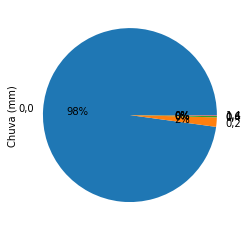

In [26]:
dataframe['Chuva (mm)'].value_counts().head().plot.pie(autopct='%.0f%%')

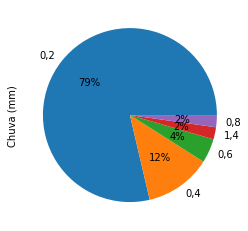

In [27]:
teste = dataframe.copy()
teste.drop(teste.index[teste['Chuva (mm)'] == '0,0'], inplace = True)
teste['Chuva (mm)'].value_counts().head().plot.pie(autopct='%.0f%%')

## Identificação de Outliers:

In [28]:
# result['Radiacao (KJ/m²)'].plot.box(grid = True, figsize=(6,4))

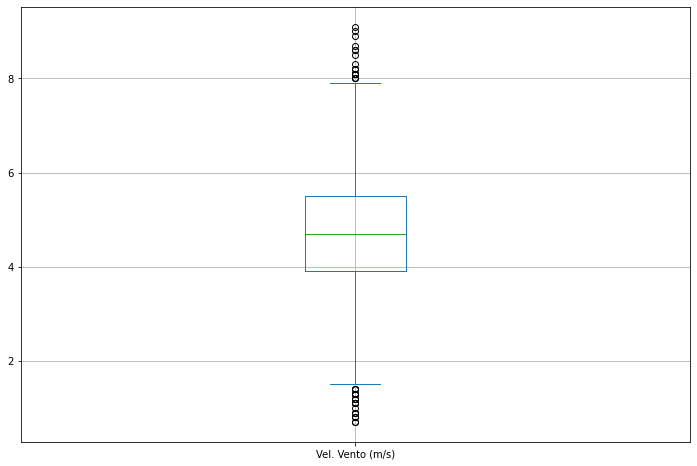

In [29]:
result['Vel. Vento (m/s)'].plot.box(grid = True, figsize=(12,8))

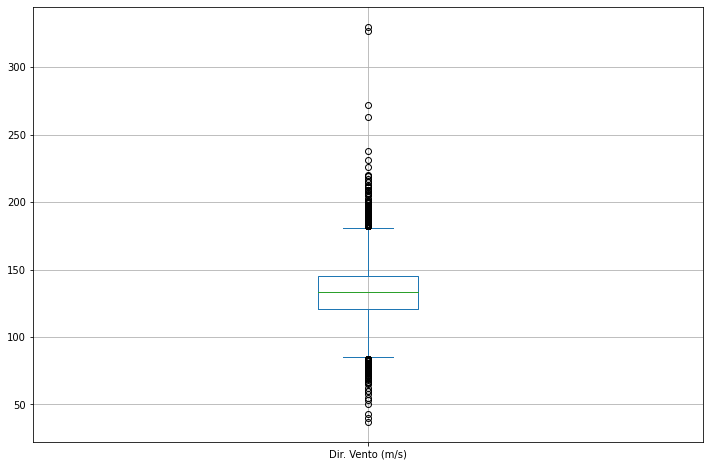

In [30]:
result['Dir. Vento (m/s)'].plot.box(grid = True, figsize=(12,8))

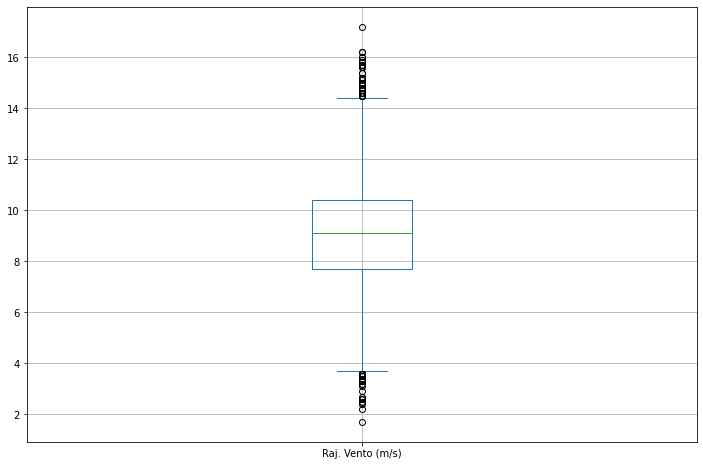

In [31]:
result['Raj. Vento (m/s)'].plot.box(grid = True, figsize=(12,8))

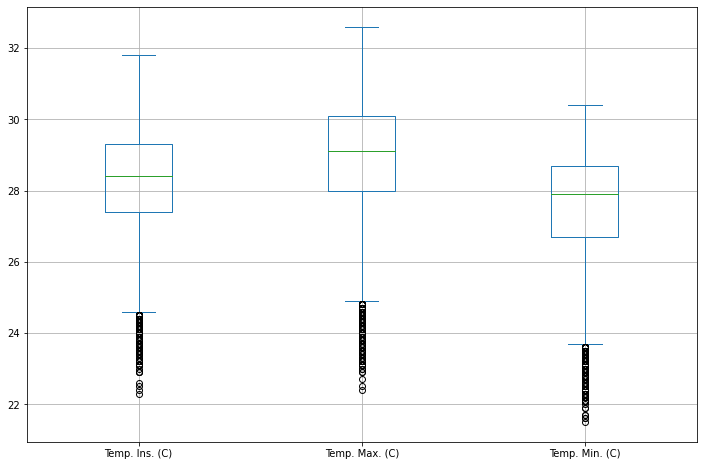

In [32]:
colunas = ['Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)']
result[colunas].plot.box(grid = True, figsize=(12,8))

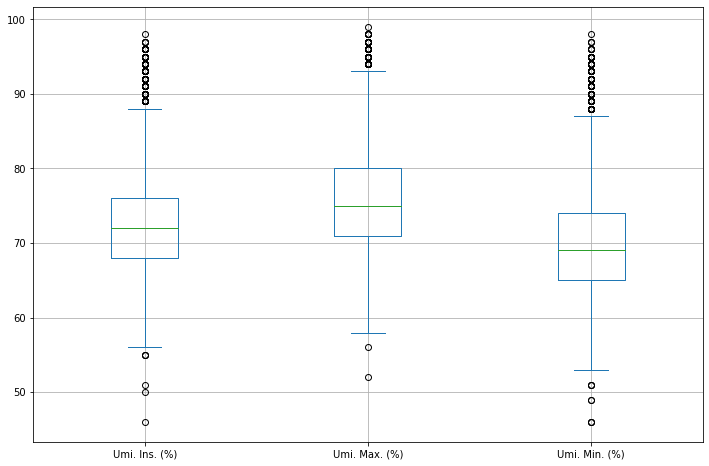

In [33]:
colunas = ['Umi. Ins. (%)', 'Umi. Max. (%)', 'Umi. Min. (%)']
result[colunas].plot.box(grid = True, figsize=(12,8))

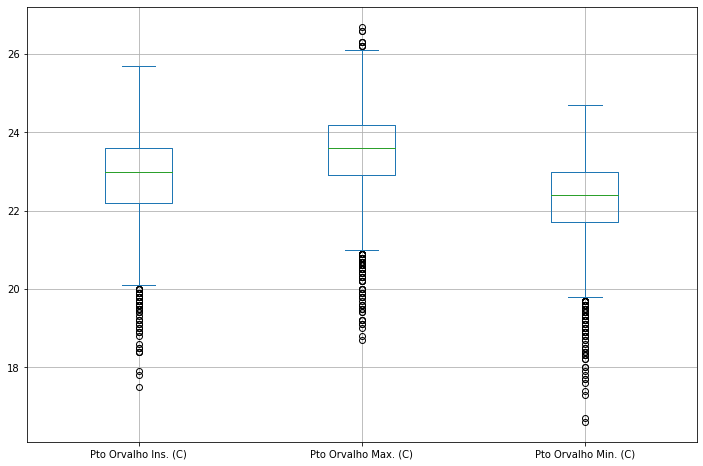

In [34]:
colunas = ['Pto Orvalho Ins. (C)', 'Pto Orvalho Max. (C)', 'Pto Orvalho Min. (C)']
result[colunas].plot.box(grid = True, figsize=(12,8))

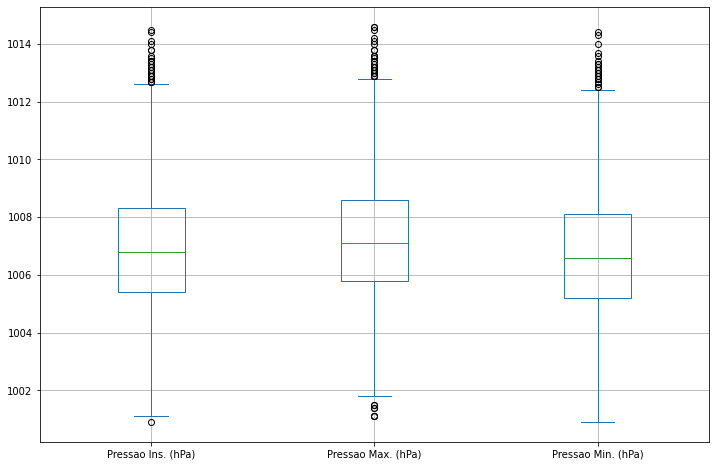

In [35]:
colunas = ['Pressao Ins. (hPa)', 'Pressao Max. (hPa)', 'Pressao Min. (hPa)']
result[colunas].plot.box(grid = True, figsize=(12,8))

## Gráfico de Dispersão:

In [40]:
#sb.pairplot(data=result[['Temp. Ins. (C)', 'Umi. Ins. (%)', 'Pto Orvalho Ins. (C)', 'Pressao Ins. (hPa)']])

## Mapa de Calor:

In [38]:
relação = result[['Temp. Ins. (C)', 'Umi. Ins. (%)', 'Pto Orvalho Ins. (C)', 'Pressao Ins. (hPa)']]

* 1 significa uma correlação perfeita positiva entre as duas variáveis; 
* -1 significa uma correlação perfeita negativa entre as duas variáveis. 
Uma correlação negativa é uma relação entre duas variáveis ​​que se movem em direções opostas.
* 0 significa que as duas variáveis não dependem linearmente uma da outra 

* Pode-se dizer ainda que, considerando os valores positivos ou negativos:
    0 < corr < 0.3 significa fraca correlação;
    0.3 < corr < 0.7 significa correlação moderada;
    0.7 < corr < 1 significa correlação forte.

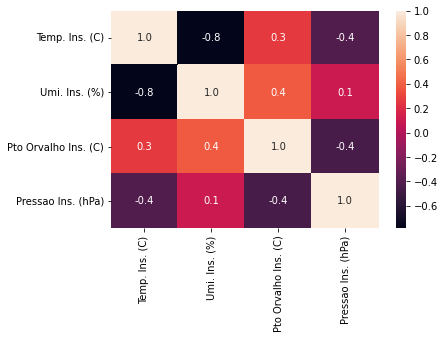

In [39]:
corr = relação.select_dtypes(exclude='object').corr()
sb.heatmap(corr, annot=True, fmt=".1f")

# GEORGE:

In [ ]:
#Questão B) Série precipitação mensal.
meses = [
  result.loc['2021-1-1':'2021-2-1'],
  result.loc['2021-2-1':'2021-3-1'],
  result.loc['2021-3-1':'2021-4-1'],
  result.loc['2021-4-1':'2021-5-1'],
  result.loc['2021-5-1':'2021-6-1'],
  result.loc['2021-6-1':'2021-7-1'],
  result.loc['2021-7-1':'2021-8-1'],
  result.loc['2021-8-1':'2021-9-1'],
  result.loc['2021-9-1':'2021-10-1'],
  result.loc['2021-10-1':'2021-11-1'],
  result.loc['2021-11-1':'2021-12-1'],
  result.loc['2021-12-1':'2021-12-31']
]

dados_chuva = []

for mes in meses:
  dados_chuva.append([
    mes["Chuva (mm)"].max(),
    mes["Chuva (mm)"].mean(),
    mes["Chuva (mm)"].min()
  ])

df_chuvas = pd.DataFrame(dados_chuva,columns=['Maxima', 'Media', 'Minima'])

df_chuvas

meses[0]

In [50]:
meses[0].describe()

,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,1537.127371,28.401355,29.126016,27.670461,71.699187,74.945799,68.788618,22.722222,23.349593,22.125745,1006.097561,1006.358266,1005.902710,4.778049,129.300813,9.275881,1910.866396,0.034146
std,336.144035,1.236459,1.357117,1.323007,6.221808,6.599349,6.409807,0.784493,0.776003,0.738398,1.965510,1.955745,1.956037,1.041649,18.630533,1.760724,1085.460403,0.150450
min,900.000000,23.900000,23.900000,22.700000,60.000000,63.000000,57.000000,19.500000,19.800000,18.900000,1000.900000,1001.100000,1000.900000,1.800000,76.000000,3.900000,32.600000,0.000000
25%,1200.000000,27.700000,28.300000,27.100000,68.000000,70.000000,64.000000,22.400000,22.900000,21.800000,1004.900000,1005.200000,1004.700000,4.100000,121.000000,8.400000,940.600000,0.000000
50%,1500.000000,28.600000,29.300000,28.000000,71.000000,74.000000,68.000000,22.800000,23.400000,22.200000,1006.000000,1006.300000,1005.800000,4.900000,129.000000,9.300000,1971.100000,0.000000
75%,1800.000000,29.300000,30.200000,28.600000,75.000000,78.000000,72.000000,23.200000,23.800000,22.600000,1007.100000,1007.400000,1006.900000,5.400000,137.000000,10.100000,2890.700000,0.000000
max,2100.000000,31.000000,31.900000,29.700000,95.000000,95.000000,91.000000,24.600000,25.300000,24.100000,1013.200000,1013.200000,1013.000000,9.000000,198.000000,17.200000,3894.100000,1.800000


In [42]:
#C) Serie de Temperatura mínima, media e máxima.
dados_temperatura = []

for mes in meses:
  dados_temperatura.append([
    mes["Temp. Max. (C)"].max(),
    mes["Temp. Max. (C)"].mean(),
    mes["Temp. Max. (C)"].min(),
    mes["Temp. Ins. (C)"].max(),
    mes["Temp. Ins. (C)"].mean(),
    mes["Temp. Ins. (C)"].min(),
    mes["Temp. Min. (C)"].max(),
    mes["Temp. Min. (C)"].mean(),
    mes["Temp. Min. (C)"].min()
  ])

df_temperaturas = pd.DataFrame(dados_temperatura,
                               columns=['Maxima_maxima', 'Maxima_media', 'Maxima_minima',
                                        'Media_maxima', 'Media_media', 'Media_minima',
                                        'Minima_maxima', 'Minima_media', 'Minima_minima'
                                        ])

df_temperaturas

,Maxima_maxima,Maxima_media,Maxima_minima,Media_maxima,Media_media,Media_minima,Minima_maxima,Minima_media,Minima_minima
0,31.9,29.126016,23.9,31.0,28.401355,23.9,29.7,27.670461,22.7
1,32.2,29.494562,23.4,31.6,28.740181,23.4,29.8,28.029003,22.3
2,31.7,28.801644,22.5,30.9,28.121644,22.5,30.1,27.370137,22.1
3,31.8,28.996784,23.2,30.9,28.363450,23.2,29.7,27.569006,21.9
4,32.1,28.726301,23.7,30.7,28.117052,23.7,30.1,27.394798,22.1
5,31.8,28.412979,23.3,30.9,27.795575,23.2,29.7,27.012094,22.1
6,31.5,28.103198,22.9,30.7,27.480233,22.3,29.7,26.729651,21.5
7,31.5,28.087069,22.4,30.9,27.432471,22.4,29.6,26.668103,21.6
8,31.5,28.580415,22.7,30.9,27.903561,22.6,29.7,27.181306,22.3
9,31.7,29.126171,23.1,31.1,28.398898,23.1,29.8,27.666667,22.6


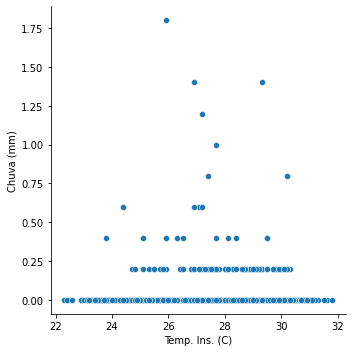

In [43]:
#D) Correlação entre precipitação e temperatura.
sb.relplot(data=result, x='Temp. Ins. (C)', y='Chuva (mm)')

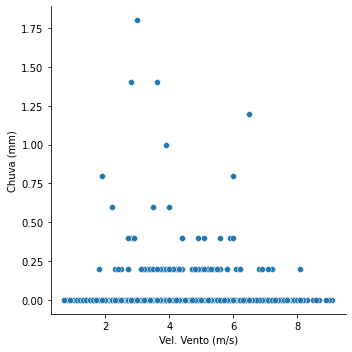

In [44]:
#E) Correlação entre precipitação e vento. 
sb.relplot(data=result, x='Vel. Vento (m/s)', y='Chuva (mm)')

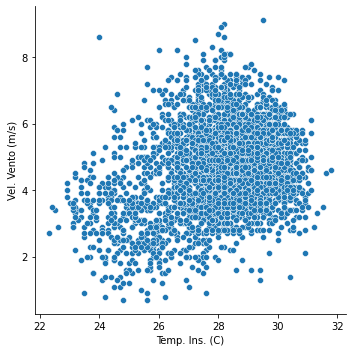

In [45]:
#F) Correlação entre temperatura e vento.
sb.relplot(data=result, x='Temp. Ins. (C)', y='Vel. Vento (m/s)')

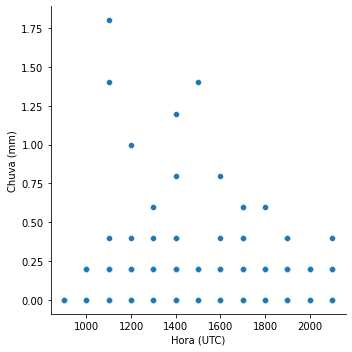

In [46]:
# Chuvas em natal acontecem na madrugada :(
sb.relplot(data=result, x='Hora (UTC)', y='Chuva (mm)')

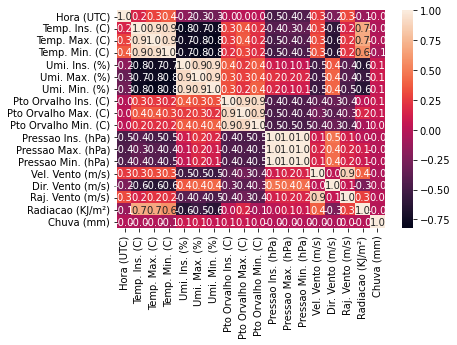

In [52]:
# Mapa de calor de correlações
corr = result.corr()
sb.heatmap(corr, annot=True, fmt=".1f")